## Diabetic Data Set

In this notebook, I analyzed a set of diabetes data from The Center for Diseace Control and Prevention. I specifically focused on the A1C test results for Hispanics and compared to other races. I performed some exploratory data analysis, cleaned the data, ran some statisticals analysis and created a visualization. 

In [1]:
#importing all libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data set to a df
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# Identifing how many rows and columns
df.shape

(101766, 50)

In [4]:
#Viewing the column names to copy and paste for cleaning/analysis
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
#see the count of non-null values and data types for each column.
#field interested on:  A1Cresult 17018 non-null   object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#Viewing the first 10 rows - I noted non-numerical values "?" 
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#replace "?" with "Unknown"
df = df.replace('?', 'Unknown')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Unknown,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Unknown,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Unknown,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
#unique values in the weight column
df['weight'].unique()

array(['Unknown', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [9]:
#created for loop to print unique values of interested columns in list 
col_list = ['race','A1Cresult', 'gender', 'age', 'time_in_hospital', 'admission_type_id', 'readmitted']
for col in col_list: 
    print(col.upper() + " Unique Values: ")
    print(df[col].unique())
    print(" ")

RACE Unique Values: 
['Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic']
 
A1CRESULT Unique Values: 
[nan '>7' '>8' 'Norm']
 
GENDER Unique Values: 
['Female' 'Male' 'Unknown/Invalid']
 
AGE Unique Values: 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
 
TIME_IN_HOSPITAL Unique Values: 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
 
ADMISSION_TYPE_ID Unique Values: 
[6 1 2 3 4 5 8 7]
 
READMITTED Unique Values: 
['NO' '>30' '<30']
 


In [10]:
#convert col with object data types  to string - created for loop and print datatype for each to confirm
object_list = ['weight', 'race', 'gender', 'readmitted', 'A1Cresult', 'age']
for col in object_list: 
    df[col] = df[col].astype("string")
    print(col + ' data type: ')
    print(df[col].dtype)

weight data type: 
string
race data type: 
string
gender data type: 
string
readmitted data type: 
string
A1Cresult data type: 
string
age data type: 
string


In [11]:
#calculated the unique count of encounter_id to ensure that there aren't any dups
#the shape of the data is (101766, 50)- NO DUPs
df['encounter_id'].nunique()

101766

In [12]:
#checking if there any null values 
df.isnull().sum()
#isnull().sum().sum()


encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [13]:
#I only want to look at the data with non-null values for A1C test results - so I dropped all row with null values in that column
df = df.dropna(subset=['A1Cresult']) 

#checking null values were remoned from A1C result column - CONFIRMED.
df.isnull().sum()




encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               16720
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [14]:
#check shape of df - should be 101766 - 84748 = 17018 - CONFIRMED
df.shape

(17018, 50)

# Analysis of Hispanic A1C Results & Race Comparison 
According to CDC.gov, A1C test measures average blood sugar level over the past 2-3 monthhs. AC1 below 5.7% is normal, between 5.7 and 6.4% indicates you have prediabetes, and 6.5% or higher indicates you have diabetes. 


In [15]:
#created a df and calculated the count of each A1C results category for Hispanic Only by using groupby() function
df_hispanic = df[df['race']=='Hispanic'].groupby(['A1Cresult'])['encounter_id'].count().reset_index()
#added a new column to identify race
df_hispanic['race'] = 'Hispanic'
df_hispanic

,A1Cresult,encounter_id,race
0,>7,98,Hispanic
1,>8,265,Hispanic
2,Norm,128,Hispanic


In [16]:
#created for loop to create a dataframe for each race and then concatenating them to the already created df
#'Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic'
race_list = ['Asian', 'Other', 'Unknown', 'AfricanAmerican', 'Caucasian']
df_all = df_hispanic
for race in race_list: 
    #created dataframe for corresponding race
    df_race =df[df['race']==race].groupby(['A1Cresult'])['encounter_id'].count().reset_index()
    #added column to identify corresponding race
    df_race['race'] = race
    #concatenated the dataframe to the existing one- df_all
    df_all = pd.concat([df_all, df_race])

#print end result    
df_all




,A1Cresult,encounter_id,race
0,>7,98,Hispanic
1,>8,265,Hispanic
2,Norm,128,Hispanic
0,>7,36,Asian
1,>8,62,Asian
2,Norm,37,Asian
0,>7,70,Other
1,>8,150,Other
2,Norm,85,Other
0,>7,82,Unknown


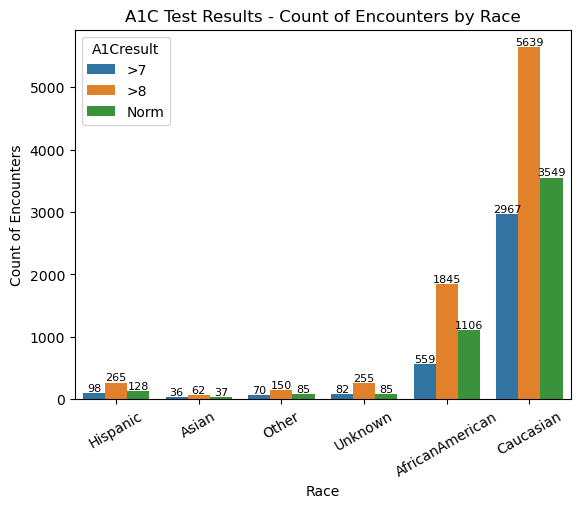

In [17]:
# plotting bar graph of A1C test results category count by race - x-axis: race, y-axis: count of testers, key: A1C results
#ax = sns.barplot(x='A1Cresult', y='encounter_id', hue='race', data=df_all)
ax = sns.barplot(x='race', y='encounter_id', hue='A1Cresult', data=df_all)


plt.title('A1C Test Results - Count of Encounters by Race')
plt.xlabel('Race')
plt.ylabel('Count of Encounters')
plt. xticks(rotation=30)
#used  for loop to iterate through each ax.containers and label the bars
for i in ax.containers:
    ax.bar_label(i, fontsize=8)
    
    

    


In [18]:
# Goal: Calculate % of individual with >7% and >8% A1C results from the total number of encounters tested for each race. 

# 1. Created df for total encounters by Race (already filtered out the non A1C testers - removed all null rows)
df_total_encounters = df.groupby(['race'])['encounter_id'].count().reset_index()
# renamed column for clarity
df_total_encounters = df_total_encounters.rename(columns={'encounter_id': 'A1C Testers'})
df_total_encounters



,race,A1C Testers
0,AfricanAmerican,3510
1,Asian,135
2,Caucasian,12155
3,Hispanic,491
4,Other,305
5,Unknown,422


In [19]:
# 2. Created df for all testers that had >7% results
df_7= df[df['A1Cresult']== '>7'].groupby(['race'])['encounter_id'].count().reset_index()
#renamed column 
df_7 = df_7.rename(columns={'encounter_id': '>7% Count'})
df_7

,race,>7% Count
0,AfricanAmerican,559
1,Asian,36
2,Caucasian,2967
3,Hispanic,98
4,Other,70
5,Unknown,82


In [20]:
# 3. Created df for all testers that had >8% results
df_8 = df[df['A1Cresult']== '>8'].groupby(['race'])['encounter_id'].count().reset_index()
df_8 = df_8.rename(columns={'encounter_id': '>8% Count'})
df_8


,race,>8% Count
0,AfricanAmerican,1845
1,Asian,62
2,Caucasian,5639
3,Hispanic,265
4,Other,150
5,Unknown,255


In [21]:
#4. merged all three df
df_merged = df_total_encounters.merge(df_7,on='race').merge(df_8,on='race')
#new column to get total of patients that had >7% and >8% result
df_merged['>7 + >8'] = df_merged['>7% Count'] + df_merged['>8% Count']
#new column to calcualte % of total encounter by race
df_merged['% of >7 + >8']= (df_merged['>7 + >8']/df_merged['A1C Testers'])*100
#new column to calculate % of total testers for each race (regardless of test results)
df_merged['% of total testers'] = (df_merged['A1C Testers'])/(df_merged['A1C Testers'].sum())*100
df_merged

,race,A1C Testers,>7% Count,>8% Count,>7 + >8,% of >7 + >8,% of total testers
0,AfricanAmerican,3510,559,1845,2404,68.490028,20.625220
1,Asian,135,36,62,98,72.592593,0.793278
2,Caucasian,12155,2967,5639,8606,70.802139,71.424374
3,Hispanic,491,98,265,363,73.930754,2.885180
4,Other,305,70,150,220,72.131148,1.792220
5,Unknown,422,82,255,337,79.857820,2.479727


In [22]:
#created dictionary to convert into dataframe to show the sum of each columns of table above - to confirm data is correct
dict = {'A1c Testers':[df_merged['A1C Testers'].sum()],
        '>7% Count':[df_merged['>7% Count'].sum()],
         '>8% Count':[df_merged['>8% Count'].sum()],
         '>7 + >8':[df_merged['>7 + >8'].sum()],
         '% of >7 + >8':['--'],
         '% of total testers':[df_merged['% of total testers'].sum()]         
        }
#converting dictionary to dataframe
df_totals = pd.DataFrame(dict)
df_totals

,A1c Testers,>7% Count,>8% Count,>7 + >8,% of >7 + >8,% of total testers
0,17018,3812,8216,12028,--,100.0


## Conclusion: 
Based on the data provided by the CDC, there were a total of 17,018 encounters that were given A1C test. Out of those tested, about 71% of testers were Caucasian, followed by 21% African American and 3% Hispanic. Looking at Hispanic group closely, 98 had a test result of >7%, 265 had a resut of >8% and 128 had a norm result - about 74% of the hispanic race tested had a result of >7% or >8%. 